In [8]:
import pandas as pd
import json
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

## Load data

In [2]:
# training data
data_path = 'raw_data'
file_list = os.listdir(data_path)
file_list = [file for file in file_list if '.csv' in file]
file_list

['open.csv',
 'close.csv',
 'one.csv',
 'four.csv',
 'two.csv',
 'three.csv',
 'ok.csv']

In [4]:
# centroids data
centroid_path = 'gestures'
centroids_file_list = os.listdir(centroid_path)
centroids_file_list = [file for file in centroids_file_list if '.json' in file]
centroids_file_list

['ok.json',
 'open.json',
 'close.json',
 'three.json',
 'one.json',
 'two.json',
 'four.json']

In [9]:
# convert json to dataframe
centroids = {}
for file in centroids_file_list:
    with open(os.path.join(centroid_path, file), 'r') as f:
        features = json.load(f)
    raw_features = np.array(features)
    ## stack data - each row is 1 feature
    stacked_data = []
    for feat in raw_features:
        feat = np.hstack(feat)
        stacked_data.append(feat)
    stacked_data = np.array(stacked_data)
    label = file.split('.')[0]
    centroids[label] = stacked_data

In [11]:
# combine data
df_list = []
for file in file_list:
    df = pd.read_csv(os.path.join(data_path, file))
    # get label according to file name
    label = file.split('.')[0]
    
    # combine with the centroid data
    # attach horizontally
    columns = df.columns[1:]
    new_columns = []
    for col in columns:
        new_columns.append(f"cen_{col}")
    # centroid data
    cen_df = pd.DataFrame(centroids[label], columns=new_columns)
    df = pd.concat([df, cen_df], axis=1)
    
    df['label'] = label
    df_list.append(df)
raw_df = pd.concat(df_list, ignore_index=True)
raw_df.head()

,Unnamed: 0,width_0_1,angle_0_1,width_1_2,angle_1_2,width_2_3,angle_2_3,width_0_4,angle_0_4,width_4_5,...,cen_angle_14_15,cen_width_1_4,cen_angle_1_4,cen_width_4_7,cen_angle_4_7,cen_width_7_10,cen_angle_7_10,cen_width_10_13,cen_angle_10_13,label
0,0,0.819609,-0.904408,0.331967,-0.620770,0.257718,-0.916986,1.021683,-0.260368,0.532174,...,0.312788,0.613621,0.663417,0.277926,1.483151,0.260682,1.849907,0.268631,2.157535,open
1,1,0.810645,-0.903196,0.323714,-0.655025,0.260854,-0.916641,1.022686,-0.259913,0.526322,...,0.150585,0.313600,-0.583246,0.068698,-2.695566,0.094253,3.047199,0.150187,2.849804,open
2,2,0.811508,-0.906968,0.320625,-0.637070,0.260857,-0.911486,1.017712,-0.256035,0.516134,...,0.293672,0.485041,-0.701991,0.023766,1.890779,0.108757,2.204399,0.140720,2.256526,open
3,3,0.812381,-0.905565,0.324766,-0.617321,0.260843,-0.901177,1.020317,-0.255500,0.521992,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,open
4,4,0.807304,-0.896712,0.326138,-0.630100,0.260517,-0.928850,1.020034,-0.254232,0.523602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,open


## Data discovering

In [9]:
# unnamed column is the old index, so remove it
raw_df = raw_df.drop(columns=['Unnamed: 0'])
raw_df.head()

,width_0_1,angle_0_1,width_1_2,angle_1_2,width_2_3,angle_2_3,width_0_4,angle_0_4,width_4_5,angle_4_5,...,angle_14_15,width_1_4,angle_1_4,width_4_7,angle_4_7,width_7_10,angle_7_10,width_10_13,angle_10_13,label
0,0.819609,-0.904408,0.331967,-0.620770,0.257718,-0.916986,1.021683,-0.260368,0.532174,-0.145286,...,0.154750,0.613456,0.670615,0.263327,1.522349,0.247839,1.876546,0.266037,2.201355,open
1,0.810645,-0.903196,0.323714,-0.655025,0.260854,-0.916641,1.022686,-0.259913,0.526322,-0.152592,...,0.103507,0.613481,0.655152,0.263085,1.526446,0.244503,1.887392,0.266048,2.185891,open
2,0.811508,-0.906968,0.320625,-0.637070,0.260857,-0.911486,1.017712,-0.256035,0.516134,-0.150371,...,0.110657,0.616664,0.666908,0.258195,1.510868,0.241334,1.919567,0.263089,2.175102,open
3,0.812381,-0.905565,0.324766,-0.617321,0.260843,-0.901177,1.020317,-0.255500,0.521992,-0.148346,...,0.102638,0.617535,0.665496,0.258182,1.521177,0.244493,1.902856,0.263075,2.185411,open
4,0.807304,-0.896712,0.326138,-0.630100,0.260517,-0.928850,1.020034,-0.254232,0.523602,-0.137181,...,0.120913,0.611258,0.658791,0.256858,1.521124,0.241667,1.882671,0.254596,2.180228,open


In [10]:
raw_df.describe()

,width_0_1,angle_0_1,width_1_2,angle_1_2,width_2_3,angle_2_3,width_0_4,angle_0_4,width_4_5,angle_4_5,...,width_14_15,angle_14_15,width_1_4,angle_1_4,width_4_7,angle_4_7,width_7_10,angle_7_10,width_10_13,angle_10_13
count,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,...,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000,17940.000000
mean,0.759644,-0.647142,0.316900,0.099094,0.244755,0.564355,1.028956,-0.232871,0.467649,-0.304571,...,0.255939,-1.081953,0.516272,0.408854,0.243955,1.501336,0.240339,2.011312,0.250517,2.134859
std,0.117231,0.325764,0.056966,0.727326,0.067214,0.941567,0.047821,0.069231,0.197768,0.812496,...,0.068618,1.724073,0.125571,0.398041,0.066418,0.450475,0.058129,0.210991,0.048069,0.845921
min,0.245020,-1.215565,0.008638,-1.895804,0.019385,-1.057691,0.862275,-0.396428,0.010055,-3.055511,...,0.071518,-3.139112,0.115986,-1.044013,0.009008,-3.077704,0.037297,0.523101,0.025585,-3.138457
25%,0.719981,-0.881001,0.281361,-0.663787,0.194661,-0.460042,0.998808,-0.273235,0.362236,-0.817878,...,0.200402,-2.678656,0.417262,0.122029,0.216268,1.429175,0.220392,1.877216,0.233639,2.110966
50%,0.767239,-0.687353,0.312842,0.370969,0.256305,0.953750,1.026453,-0.253570,0.514809,-0.223456,...,0.266478,-2.165575,0.547538,0.608391,0.262078,1.537483,0.252562,1.973268,0.261715,2.175258
75%,0.819579,-0.534528,0.352391,0.665385,0.286710,1.279128,1.063544,-0.203154,0.572626,-0.009346,...,0.307752,0.376168,0.619504,0.705290,0.281039,1.679106,0.272029,2.075784,0.275618,2.418541
max,1.114742,1.014630,0.536511,3.061840,0.424321,2.185629,1.258606,0.117688,1.057966,3.098442,...,0.440561,3.140523,0.785571,1.175734,0.480781,3.123577,0.438711,3.130042,0.430334,3.140769


In [11]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17940 entries, 0 to 17939
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   width_0_1    17940 non-null  float64
 1   angle_0_1    17940 non-null  float64
 2   width_1_2    17940 non-null  float64
 3   angle_1_2    17940 non-null  float64
 4   width_2_3    17940 non-null  float64
 5   angle_2_3    17940 non-null  float64
 6   width_0_4    17940 non-null  float64
 7   angle_0_4    17940 non-null  float64
 8   width_4_5    17940 non-null  float64
 9   angle_4_5    17940 non-null  float64
 10  width_5_6    17940 non-null  float64
 11  angle_5_6    17940 non-null  float64
 12  width_7_8    17940 non-null  float64
 13  angle_7_8    17940 non-null  float64
 14  width_8_9    17940 non-null  float64
 15  angle_8_9    17940 non-null  float64
 16  width_0_10   17940 non-null  float64
 17  angle_0_10   17940 non-null  float64
 18  width_10_11  17940 non-null  float64
 19  angl

## Split data

In [18]:
X_data = raw_df.values[:, :36]
Y_data = raw_df.values[:, 36]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=100)
print(x_test)
print(y_test)

[[0.8279122934648346 -0.8473073292431584 0.32085950145216385 ...
  1.9152775156597373 0.19492104575718408 2.1181731219029483]
 [0.7226514102054052 -0.3878093506873977 0.2837849756013515 ...
  2.0305632002940097 0.35784013096729883 2.1693425720922006]
 [0.6749184489805704 -0.4781906820750418 0.199394130137702 ...
  1.9601130486280371 0.21960726186852544 2.144797428714492]
 ...
 [0.7821832567340459 0.6819014079662369 0.3124501872954515 ...
  2.374049735331898 0.09489688714762573 2.4406178991077208]
 [0.7102196745702449 -0.5860973735203383 0.2329569389421465 ...
  2.282911844384894 0.19464290524745104 2.6517172400896976]
 [0.6938490100425296 -0.4808872801953356 0.2598719538393349 ...
  1.842352112382711 0.24599315034134356 2.1444747027827096]]
['ok' 'close' 'three' ... 'one' 'four' 'four']


## Feature Importance

In [24]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [25]:
# get importances
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.03004
Feature: 1, Score: 0.02863
Feature: 2, Score: 0.02552
Feature: 3, Score: 0.03735
Feature: 4, Score: 0.02537
Feature: 5, Score: 0.03630
Feature: 6, Score: 0.02538
Feature: 7, Score: 0.02338
Feature: 8, Score: 0.03295
Feature: 9, Score: 0.02989
Feature: 10, Score: 0.03533
Feature: 11, Score: 0.03031
Feature: 12, Score: 0.02490
Feature: 13, Score: 0.02705
Feature: 14, Score: 0.02891
Feature: 15, Score: 0.03158
Feature: 16, Score: 0.02451
Feature: 17, Score: 0.02060
Feature: 18, Score: 0.02602
Feature: 19, Score: 0.02468
Feature: 20, Score: 0.02780
Feature: 21, Score: 0.03663
Feature: 22, Score: 0.02488
Feature: 23, Score: 0.02085
Feature: 24, Score: 0.02708
Feature: 25, Score: 0.02644
Feature: 26, Score: 0.02380
Feature: 27, Score: 0.03942
Feature: 28, Score: 0.02512
Feature: 29, Score: 0.03783
Feature: 30, Score: 0.02301
Feature: 31, Score: 0.02420
Feature: 32, Score: 0.02135
Feature: 33, Score: 0.02394
Feature: 34, Score: 0.02248
Feature: 35, Score: 0.02647


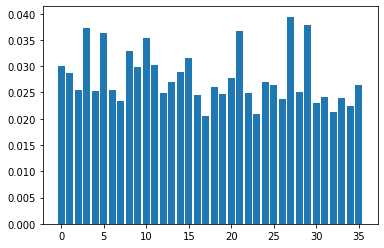

In [27]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
It seems that all feautr